# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). <br>
You decide that a Linear Regression model might be a good candidate to solve this problem.<br>

Data set: <br>

- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars

# LIBRARIES IMPORT 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# IMPORT DATASET

In [3]:
IceCream = pd.read_csv("IceCreamData.csv")
IceCream.head()
IceCream.tail()
IceCream.describe()
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# VISUALIZE DATASET

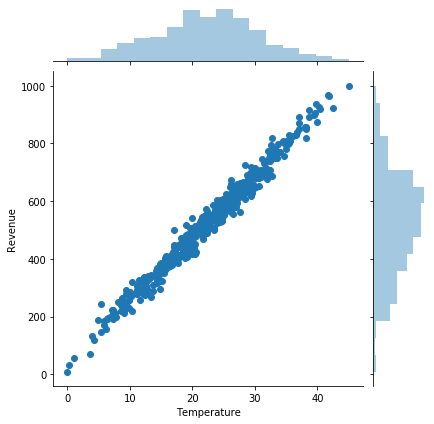

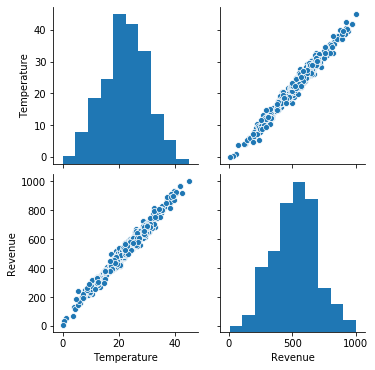

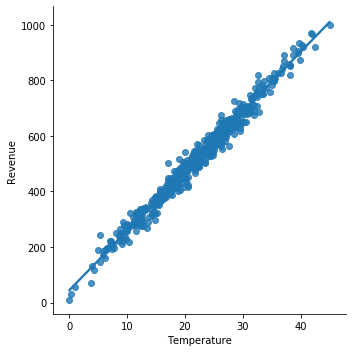

In [5]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)
sns.pairplot(IceCream)
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)


# CREATE TESTING AND TRAINING DATASET 

In [6]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]

from sklearn.model_selection import train_test_split

#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# TRAIN THE MODEL

In [7]:
X_train.shape

from sklearn.linear_model import LinearRegression

#instatiation of an object out of our class
#when "fit_intercept = True" - asking the model to obtain intercept which is value of 'm' and 'b'
#when "fit_intercept = False" - model will obtain only the 'm' value; 'b' will be zero by default
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)


Linear Model Coefficient (m):  [21.30428832]
Linear Model Coefficient (b):  48.12390721938988


# TEST THE MODEL 

In [8]:
y_predict = regressor.predict( X_test)
y_predict
y_test

432    634.121978
466    926.067153
453    746.946389
263    543.985058
207    228.901030
          ...    
253    691.516541
388    221.400252
34     809.463411
289    350.629036
11      71.160153
Name: Revenue, Length: 125, dtype: float64

# VISUALIZE TRAIN SET RESULTS

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

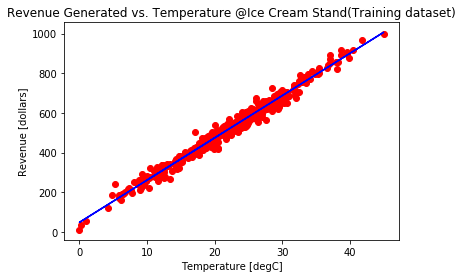

In [12]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

# VISUALIZE TEST SET RESULTS

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

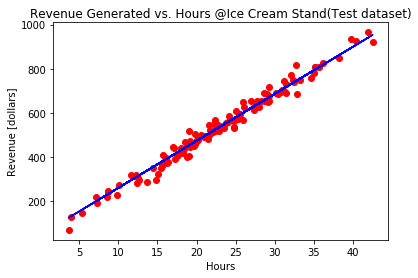

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')


In [19]:

y_predict = regressor.predict(np.array([30]).reshape(1, 1))
y_predict


array([687.25255691])